## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

# packages from gensim
from gensim import corpora
from gensim.parsing.preprocessing import STOPWORDS


### Loading dataset

In [2]:
# loading smartphones dataset
smartphones = pd.read_csv(r"C:\Users\siwac\machine learning models\smartphones.csv")
smartphones.head(5)

Reviews  Ratings
0  Please be aware that this is a downgraded vers...        2
1  What a Smartphone by Xiaomi! I am thoroughly i...        5
2  Received my Mi 11x Pro today😻 . Really excited...        4
3  I love gaming and have been waiting for a SDM ...        5
4  I am a oneplus 5 user for the last 4 years. So...        3

In [3]:
# loading laptops dataset
laptops = pd.read_csv(r"C:\Users\siwac\machine learning models\laptops.csv")
laptops.head(5)

Reviews  Ratings
0  The laptop came in excellent package - the pac...        5
1  Its superbIts world's lightest laptopSuperb ba...        5
2  Ordered it a few days ago in the Amazon sale a...        4
3  The laptop came in excellent package - the pac...        5
4  Its superbIts world's lightest laptopSuperb ba...        5

In [4]:
# loading iphone dataset
iphone = pd.read_csv(r"C:\Users\siwac\machine learning models\iphone11.csv")
iphone.head(5)

Reviews  Ratings
0  Worst battery performance.Iphone 11 is far bet...        3
1  Your browser does not support HTML5 video. Ano...        5
2  Sold kidney bought this, now not feeling well ...        4
3  This was my first switch to an ios device afte...        5
4  Extremely disappointed with this phone. It’s a...        1

In [5]:
# loading headphones dataset
headphones=pd.read_csv(r"C:\Users\siwac\machine learning models\headphones.csv")
headphones.head(5)

Reviews  Ratings
0  What makes LG think that people will buy their...        3
1  Price should be less,they are comparing them w...        5
2                            Sound quality verrypoor        2
3  In Love with Music again!!! What a tws. So I a...        5
4  The sleek and minimal design makes it attracti...        5

In [6]:
# loading regrigerators dataset
refrigerators=pd.read_csv(r"C:\Users\siwac\machine learning models\refrigerators.csv")
refrigerators.head(5)

Reviews  Ratings
0  Bought it at Rs. 20,990/- and got the delivery...        5
1  The piece is defective, the Haier technician w...        1
2  Been using it for two months, no frills fridge...        4
3  2020 model Initial 48 hours review.I love the ...        5
4  Fridge is alright feature-wise, but god help y...        1

In [7]:
# loading monitors dataset
monitors=pd.read_csv(r"C:\Users\siwac\machine learning models\monitors.csv")
monitors.head(5)

Reviews  Ratings
0  0,Super For PriceWas thinking to get LG 650F b...      4.0
1  1,"I was one of the first customers to buy thi...      4.0
2  2,"This display has bleeding issues on all fou...      3.0
3  3,Overall a good product but there's backlight...      4.0
4  4,Super For PriceWas thinking to get LG 650F b...      4.0

In [8]:
# Concatenating all dataset together
df = pd.concat([smartphones,laptops,iphone,refrigerators,monitors,headphones],ignore_index=True)
df.shape

(39752, 2)

In [9]:
# Removing all duplicated data from datset
df.drop_duplicates(inplace=True,ignore_index=True)

In [10]:
# Checking null values
df.isnull().sum()

Reviews    5
Ratings    0
dtype: int64

In [11]:
# Dropping null values
df.dropna(inplace=True)

In [12]:
# Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18516 entries, 0 to 18520
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reviews  18516 non-null  object 
 1   Ratings  18516 non-null  float64
dtypes: float64(1), object(1)
memory usage: 434.0+ KB


In [13]:
# Checking shape of dataset
df.shape

(18516, 2)

In [14]:
# copying dataset
reviews = df.copy()

In [15]:
reviews

Reviews  Ratings
0      Please be aware that this is a downgraded vers...      2.0
1      What a Smartphone by Xiaomi! I am thoroughly i...      5.0
2      Received my Mi 11x Pro today😻 . Really excited...      4.0
3      I love gaming and have been waiting for a SDM ...      5.0
4      I am a oneplus 5 user for the last 4 years. So...      3.0
...                                                  ...      ...
18516  This is my experience i am sharing, your might...      2.0
18517  First of all I got the device up to the mark, ...      4.0
18518  I bought this for my I keyboard praying in chu...      4.0
18519  Okay! Thanks to Those IITians who are made thi...      5.0
18520  Worst headset I ever bought. Broke within one ...      1.0

[18516 rows x 2 columns]

In [16]:
# let's check total count of each rating
reviews['Ratings'].value_counts()

5.0    7582
1.0    4251
4.0    3719
3.0    1816
2.0    1148
Name: Ratings, dtype: int64

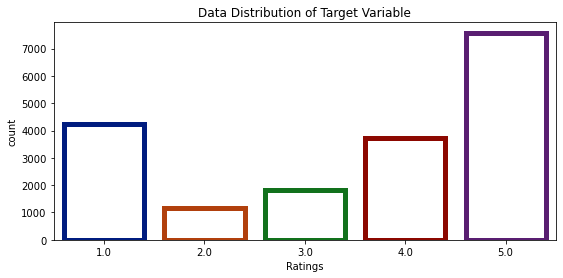

In [17]:
# Let's check data distribution of target variable
plt.figure(figsize=(9,4),frameon=False)
sns.countplot('Ratings',data=reviews,color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 5))
plt.title("Data Distribution of Target Variable")
plt.xlabel("Ratings")
plt.show()

# Data- Cleaning 
### Text Preprocessing

In [18]:
# Find out the total length of strings
pre_process_length=sum(reviews['Reviews'].str.len())
print("Total length of strings before text preprocessing - ",pre_process_length)

Total length of strings before text preprocessing -  6205449


In [19]:
# Lowering the upper case letters

reviews['Reviews'] = reviews['Reviews'].str.lower()

In [20]:
# Checking sample review
reviews['Reviews'][0]

'please be aware that this is a downgraded version of globally launched mi 11 and mi 11 pro.reason for low rating -1. ordinary display. this is not the 2k display as featured on global versions of mi 11 series2. no gorilla glass victus unlike global version.3. band tests shows poor build quality which may result in breakage of phone due to bending4. such a cheap tactic of selling a phone with the promise of fast charging and not providing charger with a adequate charging capacity.5. no curved display unlike global version.6. took almost 20 days to get my hands on the phone post order.7. reported heating issues in sd 888 while playing intensive gamesin short, xiaomi has attempted to sell big story by first launching mi 11 globally and then putting "x" and selling subpar product in india through illusion.i guess, xiaomi should not have cut the corners and compromise the quality in indian versions. indians are willing to pay premium and success of oneplus is the testament to that. any cun

In [21]:
# Removal of stopwords and unnecessary words like punctuations, signs, numbers.
def stop_words(text):
    stp_wrds=set(STOPWORDS).union(set(string.punctuation).union(set(["phone","monitor","product",'buy'])))
    tokens=regexp_tokenize(text,"[a-z']+")
    return [t for t in tokens if t not in stp_wrds]

In [22]:
# Apply the above function to the columns reviews
reviews['Reviews']=reviews["Reviews"].apply(stop_words)

In [23]:
reviews

Reviews  Ratings
0      [aware, downgraded, version, globally, launche...      2.0
1      [smartphone, xiaomi, thoroughly, impressed, pl...      5.0
2      [received, mi, x, pro, today, excited, came, p...      4.0
3      [love, gaming, waiting, sdm, k, compromise, as...      5.0
4      [oneplus, user, years, compare, oneplus, mi, x...      3.0
...                                                  ...      ...
18516  [experience, sharing, differ, joke, bass, peop...      2.0
18517  [got, device, mark, seeing, review, dilemma, h...      4.0
18518  [bought, keyboard, praying, church, propose, t...      4.0
18519  [okay, thanks, iitians, unique, representing, ...      5.0
18520  [worst, headset, bought, broke, month, right, ...      1.0

[18516 rows x 2 columns]

In [24]:
print(reviews['Reviews'][0],end="")

['aware', 'downgraded', 'version', 'globally', 'launched', 'mi', 'mi', 'pro', 'reason', 'low', 'rating', 'ordinary', 'display', 'k', 'display', 'featured', 'global', 'versions', 'mi', 'series', 'gorilla', 'glass', 'victus', 'unlike', 'global', 'version', 'band', 'tests', 'shows', 'poor', 'build', 'quality', 'result', 'breakage', 'bending', 'cheap', 'tactic', 'selling', 'promise', 'fast', 'charging', 'providing', 'charger', 'adequate', 'charging', 'capacity', 'curved', 'display', 'unlike', 'global', 'version', 'took', 'days', 'hands', 'post', 'order', 'reported', 'heating', 'issues', 'sd', 'playing', 'intensive', 'gamesin', 'short', 'xiaomi', 'attempted', 'sell', 'big', 'story', 'launching', 'mi', 'globally', 'putting', 'x', 'selling', 'subpar', 'india', 'illusion', 'guess', 'xiaomi', 'cut', 'corners', 'compromise', 'quality', 'indian', 'versions', 'indians', 'willing', 'pay', 'premium', 'success', 'oneplus', 'testament', 'cunning', 'undercut', 'value', 'proposition', 'hurt', 'xiaomi', 

In [25]:
# After stopwords removal now we are going to lemmatze words

result = [] # empty list to store data
lemma = WordNetLemmatizer()

# function for lemmatization
def lemmatize(text):
    word1=lemma.lemmatize(text,pos='n')
    word2=lemma.lemmatize(word1,pos='v')
    return lemma.lemmatize(word2,pos=("a"))

# function for filtering and apply above function to the column
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize(token))
            
    return result

In [26]:

#Processing review with above Function
processed_review = []

for doc in reviews['Reviews']:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

18516


[['aware',
  'downgrade',
  'version',
  'globally',
  'launch',
  'pro',
  'reason',
  'low',
  'rat',
  'ordinary',
  'display',
  'display',
  'feature',
  'global',
  'version',
  'series',
  'gorilla',
  'glass',
  'victus',
  'unlike',
  'global',
  'version',
  'band',
  'test',
  'show',
  'poor',
  'build',
  'quality',
  'result',
  'breakage',
  'bend',
  'cheap',
  'tactic',
  'sell',
  'promise',
  'fast',
  'charge',
  'provide',
  'charger',
  'adequate',
  'charge',
  'capacity',
  'curve',
  'display',
  'unlike',
  'global',
  'version',
  'take',
  'day',
  'hand',
  'post',
  'order',
  'report',
  'heat',
  'issue',
  'play',
  'intensive',
  'gamesin',
  'short',
  'xiaomi',
  'attempt',
  'sell',
  'big',
  'story',
  'launch',
  'globally',
  'put',
  'sell',
  'subpar',
  'india',
  'illusion',
  'guess',
  'xiaomi',
  'cut',
  'corner',
  'compromise',
  'quality',
  'indian',
  'version',
  'indian',
  'will',
  'pay',
  'premium',
  'success',
  'oneplus',
 

In [27]:
# Assigning new column to the processed reviews
reviews['cleaned_reviews'] = processed_review


In [28]:
# Changing uncleaned reviews into cleaned reviews
reviews['Reviews'] = reviews['cleaned_reviews'].apply(lambda x:' '.join(y for y in x))

In [29]:
# checking sample of cleaned review
reviews['Reviews'][0]

'aware downgrade version globally launch pro reason low rat ordinary display display feature global version series gorilla glass victus unlike global version band test show poor build quality result breakage bend cheap tactic sell promise fast charge provide charger adequate charge capacity curve display unlike global version take day hand post order report heat issue play intensive gamesin short xiaomi attempt sell big story launch globally put sell subpar india illusion guess xiaomi cut corner compromise quality indian version indian will pay premium success oneplus testament cunning undercut value proposition hurt xiaomi long run note currently use redmi note pro phone xiaomi launch india hold adequate credential voice criticism fan'

In [30]:
# Let's find new cleaned lenght of reviews
cleaned_txt_length=sum(reviews['Reviews'].str.len())
print("Cleaned text length after text preprocessing - ",cleaned_txt_length)

Cleaned text length after text preprocessing -  3330748


In [31]:
reviews

Reviews  Ratings  \
0      aware downgrade version globally launch pro re...      2.0   
1      smartphone xiaomi thoroughly impress plus earl...      5.0   
2      receive pro today excite come power adapter us...      4.0   
3      love game wait sdm compromise aspect finally h...      5.0   
4      oneplus user year compare oneplus pro have bad...      3.0   
...                                                  ...      ...   
18516  experience share differ joke bass people claim...      2.0   
18517  get device mark see review dilemma headphone p...      4.0   
18518  buy keyboard pray church propose think average...      4.0   
18519  okay thank iitians unique represent india i'm ...      5.0   
18520  bad headset buy break month right stoop play k...      1.0   

                                         cleaned_reviews  
0      [aware, downgrade, version, globally, launch, ...  
1      [smartphone, xiaomi, thoroughly, impress, plus...  
2      [receive, pro, today, excite, come, power, ada...  
3      [love, game, wait, sdm, compromise, aspect, fi...  
4      [oneplus, user, year, compare, oneplus, pro, h...  
...                                                  ...  
18516  [experience, share, differ, joke, bass, people...  
18517  [get, device, mark, see, review, dilemma, head...  
18518  [buy, keyboard, pray, church, propose, think, ...  
18519  [okay, thank, iitians, unique, represent, indi...  
18520  [bad, headset, buy, break, month, right, stoop...  

[18516 rows x 3 columns]

In [32]:
# Dropping column
reviews.drop(['cleaned_reviews'],axis=1,inplace=True)

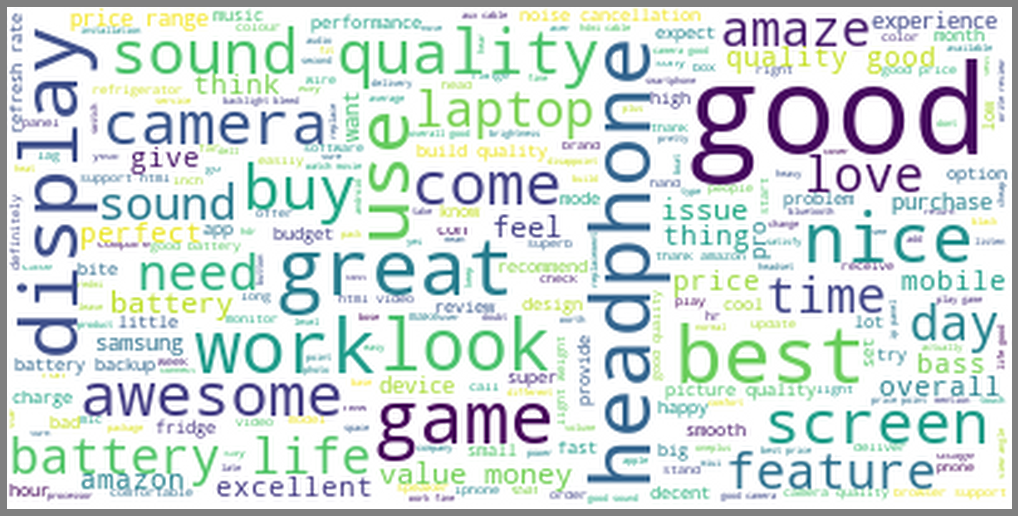

In [33]:
# Using wordcloud see the texts which are most repeated in 5 star ratings
star_5 = reviews['Reviews'][reviews['Ratings']==5.0]
combined_5star=' '.join(star_5)
plt.figure(figsize=(18,12),facecolor='grey')
wordcloud = WordCloud(max_font_size=50,max_words=250,background_color='white').generate(combined_5star)

# Display the generated image:
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

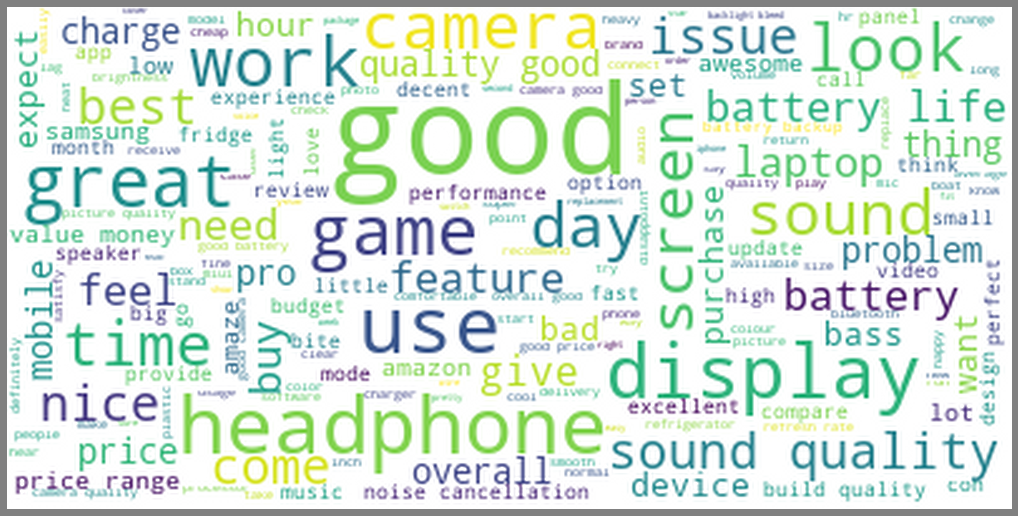

In [34]:
# Using wordcloud see the texts which are most repeated in 4 star ratings
star_4 = reviews['Reviews'][reviews['Ratings']==4.0]
combined_4star=' '.join(star_4)
plt.figure(figsize=(18,12),facecolor='grey')
wordcloud = WordCloud(max_font_size=50,max_words=250,background_color='white').generate(combined_4star)

# Display the generated image:
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

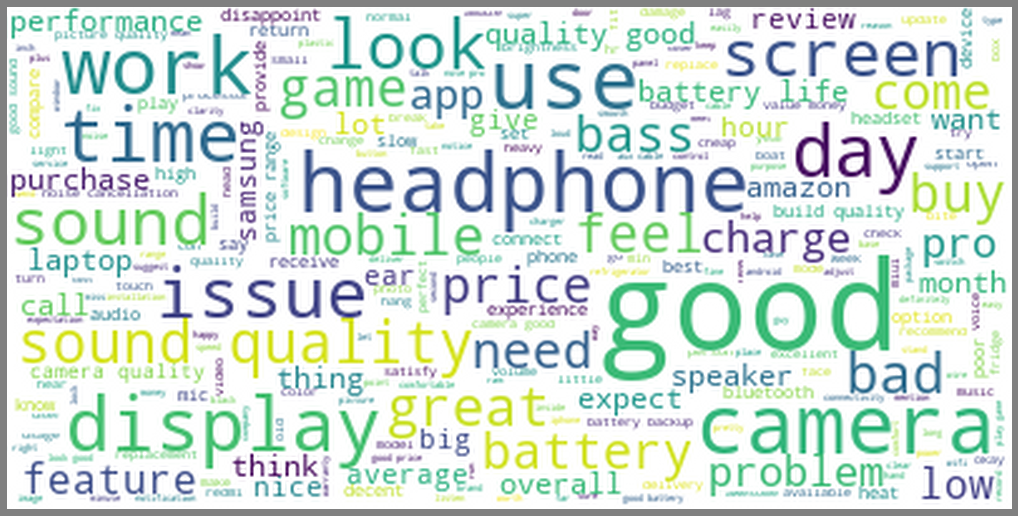

In [35]:
# Using wordcloud see the texts which are most repeated in 3 star ratings
star_3 = reviews['Reviews'][reviews['Ratings']==3.0]
combined_3star=' '.join(star_3)
plt.figure(figsize=(18,12),facecolor='grey')
wordcloud = WordCloud(max_font_size=50,max_words=250,background_color='white').generate(combined_3star)

# Display the generated image:
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

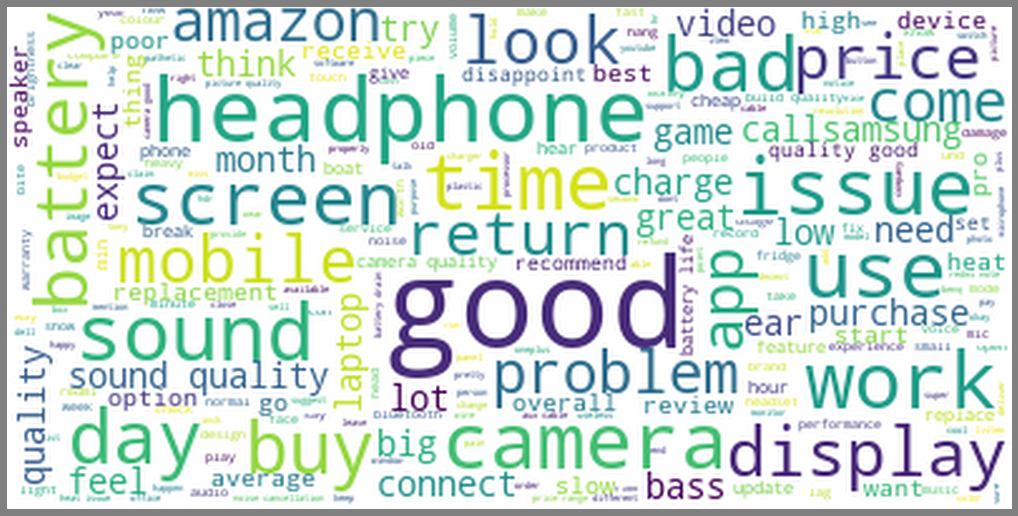

In [36]:
# Using wordcloud see the texts which are most repeated in 2 star ratings
star_2 = reviews['Reviews'][reviews['Ratings']==2.0]
combined_2star=' '.join(star_2)
plt.figure(figsize=(18,12),facecolor='grey')
wordcloud = WordCloud(max_font_size=50,max_words=250,background_color='white').generate(combined_2star)

# Display the generated image:
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

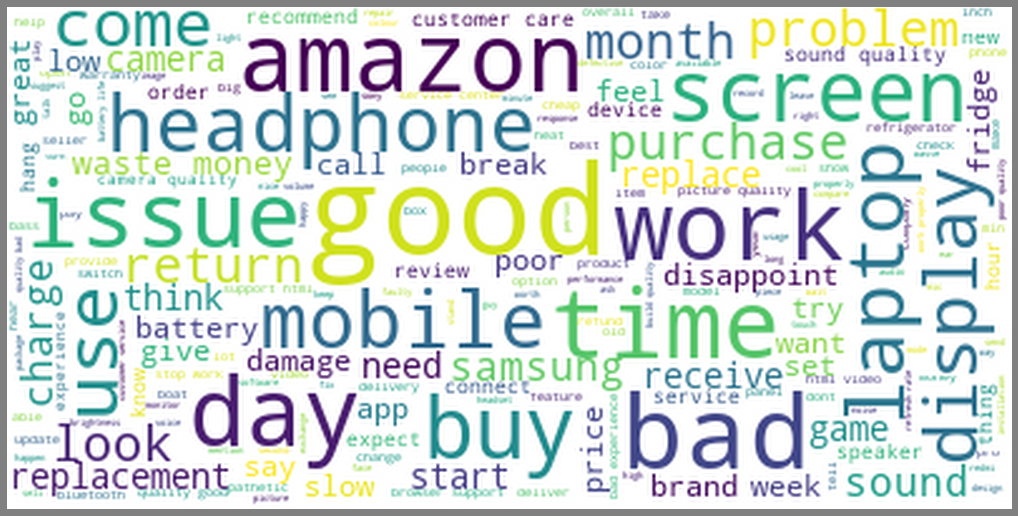

In [37]:
# Using wordcloud see the texts which are most repeated in 1 star ratings
star_1 = reviews['Reviews'][reviews['Ratings']==1]
combined_1star=' '.join(star_1)
plt.figure(figsize=(18,12),facecolor='grey')
wordcloud = WordCloud(max_font_size=50,max_words=250,background_color='white').generate(combined_1star)

# Display the generated image:
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

# Model Building

In [38]:
# copying dataset
df_model = reviews.copy()

In [39]:
# Importing library to vectorize the data for model building
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
# Applying function for vectorizing
tf_idf1 = TfidfVectorizer(max_features=750,norm='l2')


In [41]:
# fit and transform the dataset
features = tf_idf1.fit_transform(df_model['Reviews'])
features

<18516x750 sparse matrix of type '<class 'numpy.float64'>'
	with 316855 stored elements in Compressed Sparse Row format>

In [42]:
# storing in dataframe
vectorized_features= pd.DataFrame(features.todense(),columns=tf_idf1.get_feature_names())
vectorized_features

able  absolutely  accord  accurate  acer  actually  adapter  add  \
0       0.0         0.0     0.0       0.0   0.0       0.0  0.00000  0.0   
1       0.0         0.0     0.0       0.0   0.0       0.0  0.00000  0.0   
2       0.0         0.0     0.0       0.0   0.0       0.0  0.21108  0.0   
3       0.0         0.0     0.0       0.0   0.0       0.0  0.00000  0.0   
4       0.0         0.0     0.0       0.0   0.0       0.0  0.00000  0.0   
...     ...         ...     ...       ...   ...       ...      ...  ...   
18511   0.0         0.0     0.0       0.0   0.0       0.0  0.00000  0.0   
18512   0.0         0.0     0.0       0.0   0.0       0.0  0.00000  0.0   
18513   0.0         0.0     0.0       0.0   0.0       0.0  0.00000  0.0   
18514   0.0         0.0     0.0       0.0   0.0       0.0  0.00000  0.0   
18515   0.0         0.0     0.0       0.0   0.0       0.0  0.00000  0.0   

       adjust  adjustable  ...  worry  worth  write  wrong    xiaomi  \
0         0.0         0.0  ...    0.0    0.0    0.0    0.0  0.390202   
1         0.0         0.0  ...    0.0    0.0    0.0    0.0  0.173649   
2         0.0         0.0  ...    0.0    0.0    0.0    0.0  0.000000   
3         0.0         0.0  ...    0.0    0.0    0.0    0.0  0.121831   
4         0.0         0.0  ...    0.0    0.0    0.0    0.0  0.000000   
...       ...         ...  ...    ...    ...    ...    ...       ...   
18511     0.0         0.0  ...    0.0    0.0    0.0    0.0  0.000000   
18512     0.0         0.0  ...    0.0    0.0    0.0    0.0  0.000000   
18513     0.0         0.0  ...    0.0    0.0    0.0    0.0  0.000000   
18514     0.0         0.0  ...    0.0    0.0    0.0    0.0  0.000000   
18515     0.0         0.0  ...    0.0    0.0    0.0    0.0  0.000000   

           year  yes  you  youtube      zoom  
0      0.000000  0.0  0.0      0.0  0.000000  
1      0.000000  0.0  0.0      0.0  0.000000  
2      0.000000  0.0  0.0      0.0  0.000000  
3      0.092367  0.0  0.0      0.0  0.125254  
4      0.209272  0.0  0.0      0.0  0.000000  
...         ...  ...  ...      ...       ...  
18511  0.000000  0.0  0.0      0.0  0.000000  
18512  0.000000  0.0  0.0      0.0  0.000000  
18513  0.000000  0.0  0.0      0.0  0.000000  
18514  0.000000  0.0  0.0      0.0  0.000000  
18515  0.000000  0.0  0.0      0.0  0.000000  

[18516 rows x 750 columns]

In [43]:
# Checking the shape of vectorized features
vectorized_features.shape

(18516, 750)

In [44]:
# Independent features
X =features.toarray()
X.shape

(18516, 750)

In [45]:
# Dependent feature
y=reviews['Ratings']
y.shape

(18516,)

In [46]:
# importing required algorithms and metrics for model building
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score


In [47]:
# Using feature selection for better model building
selection = SelectFromModel(LogisticRegression())
selection.fit(vectorized_features,y)

SelectFromModel(estimator=LogisticRegression())

In [48]:
# finding valuable features
feature_name = vectorized_features.columns[selection.get_support()]
feature_name

Index(['absolutely', 'adapter', 'add', 'amaze', 'amazon', 'amd', 'amoled',
       'anc', 'android', 'angle',
       ...
       'weight', 'wide', 'wifi', 'wire', 'wireless', 'wise', 'worry', 'wrong',
       'xiaomi', 'yes'],
      dtype='object', length=303)

In [49]:
# Apply transformation on train independent dataset.

selection_New_x = selection.transform(vectorized_features)
New_x = pd.DataFrame(selection_New_x,columns=feature_name)
New_x

absolutely  adapter  add     amaze  amazon  amd    amoled  anc  \
0             0.0  0.00000  0.0  0.000000     0.0  0.0  0.000000  0.0   
1             0.0  0.00000  0.0  0.120381     0.0  0.0  0.162607  0.0   
2             0.0  0.21108  0.0  0.000000     0.0  0.0  0.195027  0.0   
3             0.0  0.00000  0.0  0.000000     0.0  0.0  0.000000  0.0   
4             0.0  0.00000  0.0  0.000000     0.0  0.0  0.000000  0.0   
...           ...      ...  ...       ...     ...  ...       ...  ...   
18511         0.0  0.00000  0.0  0.000000     0.0  0.0  0.000000  0.0   
18512         0.0  0.00000  0.0  0.000000     0.0  0.0  0.000000  0.0   
18513         0.0  0.00000  0.0  0.000000     0.0  0.0  0.000000  0.0   
18514         0.0  0.00000  0.0  0.000000     0.0  0.0  0.000000  0.0   
18515         0.0  0.00000  0.0  0.000000     0.0  0.0  0.000000  0.0   

       android  angle  ...    weight  wide  wifi      wire  wireless  wise  \
0          0.0    0.0  ...  0.000000   0.0   0.0  0.000000  0.000000   0.0   
1          0.0    0.0  ...  0.000000   0.0   0.0  0.000000  0.000000   0.0   
2          0.0    0.0  ...  0.000000   0.0   0.0  0.000000  0.000000   0.0   
3          0.0    0.0  ...  0.000000   0.0   0.0  0.000000  0.000000   0.0   
4          0.0    0.0  ...  0.000000   0.0   0.0  0.000000  0.000000   0.0   
...        ...    ...  ...       ...   ...   ...       ...       ...   ...   
18511      0.0    0.0  ...  0.000000   0.0   0.0  0.000000  0.160171   0.0   
18512      0.0    0.0  ...  0.000000   0.0   0.0  0.000000  0.000000   0.0   
18513      0.0    0.0  ...  0.000000   0.0   0.0  0.000000  0.000000   0.0   
18514      0.0    0.0  ...  0.101308   0.0   0.0  0.311553  0.117762   0.0   
18515      0.0    0.0  ...  0.000000   0.0   0.0  0.000000  0.000000   0.0   

       worry  wrong    xiaomi  yes  
0        0.0    0.0  0.390202  0.0  
1        0.0    0.0  0.173649  0.0  
2        0.0    0.0  0.000000  0.0  
3        0.0    0.0  0.121831  0.0  
4        0.0    0.0  0.000000  0.0  
...      ...    ...       ...  ...  
18511    0.0    0.0  0.000000  0.0  
18512    0.0    0.0  0.000000  0.0  
18513    0.0    0.0  0.000000  0.0  
18514    0.0    0.0  0.000000  0.0  
18515    0.0    0.0  0.000000  0.0  

[18516 rows x 303 columns]

In [50]:
# Let's now find the best random state
max_f1_score=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(New_x,y,test_size=.22,random_state=i)
    mnb=MultinomialNB()
    mnb.fit(x_train,y_train)
    y_pred=mnb.predict(x_test)
    f1=f1_score(y_test,y_pred, average='weighted')
    
    if f1>max_f1_score:
        max_f1_score=f1
        final_random_state=i
print("Max f1 score corresponding to ",final_random_state,"is ",max_f1_score,".")

Max f1 score corresponding to  89 is  0.4285512421136309 .


In [51]:
# Let's split the train and test dataset
x_train,x_test,y_train,y_test = train_test_split(New_x,y,test_size=0.2,random_state=final_random_state)
print("Train shapes : X = {}, y = {}".format(x_train.shape,y_train.shape))
print("Test shapes : X = {}, y = {}".format(x_test.shape,y_test.shape))
# Success
print("\nTraining and testing split was successful.")

Train shapes : X = (14812, 303), y = (14812,)
Test shapes : X = (3704, 303), y = (3704,)

Training and testing split was successful.


# Model Evaluation

In [52]:
# function for finding model's accuracy and other metrics

def metrics_score(model):
    print(model)
    model.fit(x_train,y_train)
    print("\nTraining ",round(model.score(x_train,y_train)*100,1),"%")
    y_pred=model.predict(x_test)
    print("\nAccuracy score - ",round(accuracy_score(y_test,y_pred)*100,1),"%")
    print("\nClassification Report - \n{}".format(classification_report(y_test,y_pred)))
  
    print("\n\nCross Validation Score - ")  
    for i in range(2,10):
        cross_val=cross_val_score(model,New_x,y,cv=i,n_jobs=1)    # cross vaildation 
    
        print("Coss validation score at ",i,"is",round(cross_val.mean()*100,1),"%")
        print(round(cross_val.std()*100,1))
    

In [53]:
metrics_score(MultinomialNB(alpha=1.0,fit_prior=True))

MultinomialNB()

Training  52.3 %

Accuracy score -  53.7 %

Classification Report - 
              precision    recall  f1-score   support

         1.0       0.64      0.58      0.61       893
         2.0       0.00      0.00      0.00       200
         3.0       1.00      0.00      0.01       356
         4.0       0.27      0.02      0.03       712
         5.0       0.51      0.95      0.66      1543

    accuracy                           0.54      3704
   macro avg       0.48      0.31      0.26      3704
weighted avg       0.52      0.54      0.43      3704



Cross Validation Score - 
Coss validation score at  2 is 50.5 %
2.3
Coss validation score at  3 is 51.8 %
3.6
Coss validation score at  4 is 51.4 %
4.2
Coss validation score at  5 is 51.3 %
5.8
Coss validation score at  6 is 50.7 %
6.2
Coss validation score at  7 is 51.0 %
6.2
Coss validation score at  8 is 50.8 %
5.9
Coss validation score at  9 is 51.4 %
6.1


In [54]:
metrics_score(GaussianNB())

GaussianNB()

Training  45.7 %

Accuracy score -  43.3 %

Classification Report - 
              precision    recall  f1-score   support

         1.0       0.48      0.58      0.52       893
         2.0       0.12      0.26      0.17       200
         3.0       0.18      0.26      0.21       356
         4.0       0.28      0.16      0.21       712
         5.0       0.64      0.54      0.59      1543

    accuracy                           0.43      3704
   macro avg       0.34      0.36      0.34      3704
weighted avg       0.46      0.43      0.44      3704



Cross Validation Score - 
Coss validation score at  2 is 22.8 %
0.4
Coss validation score at  3 is 32.7 %
4.9
Coss validation score at  4 is 34.2 %
6.7
Coss validation score at  5 is 33.8 %
7.3
Coss validation score at  6 is 36.4 %
5.7
Coss validation score at  7 is 37.7 %
4.9
Coss validation score at  8 is 37.2 %
5.0
Coss validation score at  9 is 39.2 %
5.1


In [55]:
metrics_score(BernoulliNB())

BernoulliNB()

Training  52.2 %

Accuracy score -  51.5 %

Classification Report - 
              precision    recall  f1-score   support

         1.0       0.52      0.71      0.60       893
         2.0       0.22      0.11      0.15       200
         3.0       0.36      0.15      0.21       356
         4.0       0.30      0.20      0.24       712
         5.0       0.60      0.69      0.64      1543

    accuracy                           0.51      3704
   macro avg       0.40      0.37      0.37      3704
weighted avg       0.48      0.51      0.48      3704



Cross Validation Score - 
Coss validation score at  2 is 47.1 %
4.5
Coss validation score at  3 is 47.3 %
4.7
Coss validation score at  4 is 48.7 %
6.1
Coss validation score at  5 is 45.8 %
7.7
Coss validation score at  6 is 48.0 %
7.0
Coss validation score at  7 is 47.9 %
7.8
Coss validation score at  8 is 47.2 %
7.7
Coss validation score at  9 is 48.9 %
8.3


In [56]:
metrics_score(LogisticRegression())

LogisticRegression()

Training  55.3 %

Accuracy score -  55.0 %

Classification Report - 
              precision    recall  f1-score   support

         1.0       0.60      0.65      0.62       893
         2.0       0.08      0.01      0.01       200
         3.0       0.37      0.07      0.12       356
         4.0       0.37      0.15      0.21       712
         5.0       0.56      0.86      0.68      1543

    accuracy                           0.55      3704
   macro avg       0.39      0.35      0.33      3704
weighted avg       0.49      0.55      0.49      3704



Cross Validation Score - 
Coss validation score at  2 is 51.5 %
3.3
Coss validation score at  3 is 52.8 %
4.0
Coss validation score at  4 is 52.5 %
5.3
Coss validation score at  5 is 52.3 %
6.9
Coss validation score at  6 is 52.3 %
7.1
Coss validation score at  7 is 52.3 %
7.3
Coss validation score at  8 is 51.8 %
6.8
Coss validation score at  9 is 52.8 %
7.3


In [57]:
metrics_score(DecisionTreeClassifier())

DecisionTreeClassifier()

Training  87.3 %

Accuracy score -  42.4 %

Classification Report - 
              precision    recall  f1-score   support

         1.0       0.48      0.51      0.50       893
         2.0       0.09      0.09      0.09       200
         3.0       0.17      0.15      0.16       356
         4.0       0.24      0.22      0.23       712
         5.0       0.56      0.58      0.57      1543

    accuracy                           0.42      3704
   macro avg       0.31      0.31      0.31      3704
weighted avg       0.42      0.42      0.42      3704



Cross Validation Score - 
Coss validation score at  2 is 41.1 %
1.1
Coss validation score at  3 is 41.0 %
2.7
Coss validation score at  4 is 41.9 %
4.4
Coss validation score at  5 is 42.0 %
4.5
Coss validation score at  6 is 41.5 %
4.5
Coss validation score at  7 is 41.7 %
6.4
Coss validation score at  8 is 41.8 %
4.7
Coss validation score at  9 is 41.7 %
4.8


In [58]:
metrics_score(RandomForestClassifier())

RandomForestClassifier()

Training  87.3 %

Accuracy score -  50.8 %

Classification Report - 
              precision    recall  f1-score   support

         1.0       0.57      0.60      0.58       893
         2.0       0.10      0.03      0.05       200
         3.0       0.20      0.09      0.13       356
         4.0       0.25      0.16      0.20       712
         5.0       0.57      0.77      0.66      1543

    accuracy                           0.51      3704
   macro avg       0.34      0.33      0.32      3704
weighted avg       0.45      0.51      0.47      3704



Cross Validation Score - 
Coss validation score at  2 is 48.4 %
3.0
Coss validation score at  3 is 49.4 %
4.0
Coss validation score at  4 is 48.8 %
5.1
Coss validation score at  5 is 49.3 %
6.4
Coss validation score at  6 is 49.5 %
6.8
Coss validation score at  7 is 49.7 %
7.6
Coss validation score at  8 is 48.7 %
7.0
Coss validation score at  9 is 50.0 %
6.8


## Hyperparameter Tunning

In [59]:
# Defining parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [60]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
# Cross validation technique
cv_method = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, n_jobs=-1, cv=cv_method, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(New_x, y)

In [61]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.538508 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.534187 (0.008788) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.533359 (0.009112) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.536924 (0.008259) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.535231 (0.008989) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.535249 (0.009186) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.537428 (0.008240) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.537770 (0.008779) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.537950 (0.008973) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.538508 (0.007772) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.528174 (0.006082) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.528210 (0.006023) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.524016 (0.005959) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.462465 (0.004260) wit

In [62]:
# Using the best parameters obtained
model = LogisticRegression(C= 1.0, penalty= 'l2', solver='liblinear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy score = ",round(accuracy_score(y_test,y_pred)*100,1),"%")
print('Cross validation score: ',cross_val_score(model,New_x,y,cv=3,scoring='accuracy').mean()*100)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print("Classification report\n",classification_report(y_test,y_pred))

Accuracy score =  54.8 %
Cross validation score:  52.91099589544178
Confusion matrix
 [[ 572    4    5   23  289]
 [ 100    1   14   21   64]
 [ 101    0   19   45  191]
 [  73    0    6   86  547]
 [ 107    0    7   79 1350]]
Classification report
               precision    recall  f1-score   support

         1.0       0.60      0.64      0.62       893
         2.0       0.20      0.01      0.01       200
         3.0       0.37      0.05      0.09       356
         4.0       0.34      0.12      0.18       712
         5.0       0.55      0.87      0.68      1543

    accuracy                           0.55      3704
   macro avg       0.41      0.34      0.32      3704
weighted avg       0.49      0.55      0.48      3704



# Saving the model

In [63]:
import pickle
filename="logistic_regression_ratings.pkl"   # specifying the filename
pickle.dump(model,open(filename,'wb'))

# Summary

* We have collected a lot of data from e-commerce websites. Although for better model building it should be of different websites but due to the size and convenience i have used data from Amazon only.
* After collecting all the data we combine it together into a dataframe and find out that duplicated data is present.
* Then after using Gensim stopwords library we removed the unnecessary words.
* After removal of stopwords we tokenize the sentence into words.
* Then using the Lemmatization technique we converted words into thier simpler form.
* After lemmatization we converted the textual data into vector form for model building.
* Now we splited the dataset into training and testing dataset for model building.
* Tried a lot of algorithms on dataset but `Bernoulli Naive Bayes`, `Multibnomail Naive Bayes` and `Logistic Regression` gives the better result.
* We finalised the `Logistic Regression` model and then do hyperparmater tunning by `GridSearchCV` for findig best result out of it.

##### Problems:
* As we have collected dataset from e-commerce websites, there is a lot of noise present in reviews which creates hinderence in building a accurate model. Due to this our system is unnable to identify proper textual data which is valid and thus resulting in creating too much of unnecessary features.
* Due to presence of more features it also slow down the system and we were not able to use needed techniques to solve problem.